# Финальное задание модуля EDA-4 #

## Популярные статистические тесты в Python ##

Описание задания приведено в файле [README.md](README.md)

In [309]:
import pandas as pd #для работы с таблицами

### Исходные массивы данных ###

In [310]:
# даны два списка
petersburg = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105]
magadan = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764, 0.0689]

### 1) Объединение двух массивов в DataFrame ###

In [311]:
# создадим объект Series  из списка с использованием команды pd.Series()
petersburg  = pd.Series([0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105])
magadan = pd.Series([0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764, 0.0689])
# создадим DF
df = pd.DataFrame(data={'petersburg': petersburg, 'magadan': magadan})
display(df)

,petersburg,magadan
0,0.0974,0.1033
1,0.1352,0.0915
2,0.0817,0.0781
3,0.1016,0.0685
4,0.0968,0.0677
5,0.1064,0.0697
6,0.1050,0.0764
7,NaN,0.0689


В данных по Санкт-Петербургу не хватает данных, поэтому NaN. Заполним пустые ячейки медианным значением с помощью метода *fillna*

In [312]:
df['petersburg'].fillna(round(df['petersburg'].median(), 4), inplace=True)
display(df)

,petersburg,magadan
0,0.0974,0.1033
1,0.1352,0.0915
2,0.0817,0.0781
3,0.1016,0.0685
4,0.0968,0.0677
5,0.1064,0.0697
6,0.1050,0.0764
7,0.1016,0.0689


## 2) Тесты на нормальное распределение ##

Рассматрим два часто используемых теста на нормальность: 

* тест Шапиро-Уилка;
* тест Д’Агостино K2.

Итак, для проверки данных на нормальность мы используем каждый из тестов, вычисляем p-value и затем сравниваем его с установленным α.

Здесь и далее уровень значимости устанавливается $\alpha=0,05$

In [313]:
alpha = 0.05

In [314]:
H0 = 'Данные распределены нормально'
Ha = 'Данные не распределены нормально (мы отвергаем H0)'

## Тест Шапиро-Уилка

In [315]:
from scipy.stats import shapiro

In [316]:
_, p = shapiro(df)
print('p=%.3f' % p)

# Интерпретация 

if p > alpha:
	print(H0)
else:
	print(Ha)

p=0.101
Данные распределены нормально


## Тест Д’Агостино

Тест Д'Агостино требует минимум 20 измерений, но для наглядности можно тест провести.

In [317]:
from scipy.stats import normaltest

In [318]:
_, p = normaltest(df)
#normaltest возвращает двустороннюю вероятность для проверки гипотезы

print('p=%.3f' % p[0])

# Интерпретация 

if p[0] > alpha/2:
	print(H0)
else:
	print(Ha)

p=0.035
Данные распределены нормально


c:\Program Files\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


В обоих тестах данные проходят тест на нормальность. Но насколько можно доверять этим данным. Так как размер выборки небольшой, то проверка на нормальность скорей всего не будет иметь статистической силы. С точки зрения визуализации нормальное (**гауссово**) распределение представляет собой распределение признака в виде колокола.
Нормальность распределения признака можно определить визуально, построив гистограмму распределения непрерывного признака или так называемый q-q plot. 

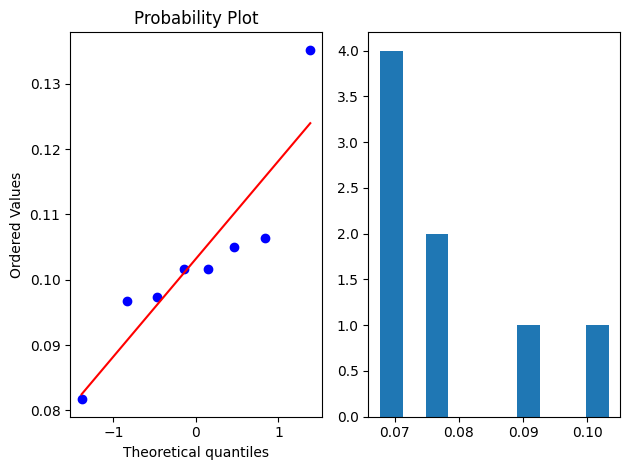

In [319]:
import matplotlib.pyplot as plt # библиотека визуализации
from scipy import stats # библиотека для расчетов

plt.subplot(1, 2, 1) # задаем сетку рисунка количество строк и столбцов
stats.probplot(df['petersburg'], plot=plt) # qq plot

plt.subplot(1, 2, 2) # располагаем второй рисунок рядом
plt.hist(df['magadan']) # гистограмма распределения признака

plt.tight_layout() # чтобы графики не наезжали другу на друга, используем tight_layout
plt.show() # просмотр графика

Кажется, признак распределён ненормально, так как q-q plot показывает слабый намёк на нормальность распределения, а гистограмма распределения совершенно не похожа на колокол. Такой признак при анализе Пирсоном может выдать некорректные результаты. 

Следовательно, тест Пирсона не подходит, надо использовать непараметрические тесты для подтверждения гипотез, так как они лучше работают на маленьких выборках.

### 3) Тест на корреляцию и его обоснование ###

- Корреляция Пирсона работает для нормального распределения количественных данных, поэтому она не годится, надо использовать непараметрические тесты.
- Можно использовать для сравнения тесты Спирмена и Кендалла. Хотя они предназначены не для количественных (как здесь), а категориальных переменных (плюс ещё - ранжированных), однако данных у нас мало, что можно, как в спорном случае, условно считать их категориями.

Тесты Спирмена и Кендалла стандартным методом **Pandas** продублируем методами из **ScyPy**. Заодно убедимся, что они равнозначны.

In [330]:
from scipy.stats import spearmanr, kendalltau

H0 = 'в данных отсутствует зависимость между переменными'
Ha = 'в данных присутствует зависимость между переменными'

display(df.corr(method='spearman'))

corr, p = spearmanr(df['petersburg'], df['magadan'])

print(f'Коэффициент корелляции Спирмена = {round(corr, 6)}')
print(f"{'Мы не можем отвергнуть нулевую гипотезу.' if p>alpha else 'Мы отвергаем нулевую гипотезу.'}")
print(f"p-value = {'%.3f' % p}: {H0 if p > alpha else Ha}")

,petersburg,magadan
petersburg,1.000000,0.155691
magadan,0.155691,1.000000


Коэффициент корелляции Спирмена = 0.155691
Мы не можем отвергнуть нулевую гипотезу.
p-value = 0.713: в данных отсутствует зависимость между переменными


In [321]:
display(df.corr(method='kendall'))

corr, p = kendalltau(df['petersburg'], magadan, alternative='two-sided')
print(f'Коэффициент корелляции Кендалла = {round(corr, 6)}')
print(f"{'Мы не можем отвергнуть нулевую гипотезу.' if p>alpha else 'Мы отвергаем нулевую гипотезу.'}")
print(f"p-value = {'%.3f' % p}: {H0 if p > alpha else Ha}")

,petersburg,magadan
petersburg,1.000000,0.181848
magadan,0.181848,1.000000


Коэффициент корелляции Кендалла = 0.181848
Мы не можем отвергнуть нулевую гипотезу.
p-value = 0.533: в данных отсутствует зависимость между переменными


### 4) Вывод по гипотезе о корелляции данных ###

-  Распределение данных принимаем отличным от нормального.
-  В любом случае (Спирман и Кендалл) коэффициент корелляции < 0,3. То есть связь очень слабая или отсутствует.

### 5) Тесты на сравнение выборок и их обоснование ###

Независимый **T-тест** проверяет разницу между одной и той же зависимой количественной переменной (размер раковины) из разных совокупностей (то есть одна независимая категориальная переменная -  географическое место). Кроме того, T-тест используется на выборках размером > 30, что подходит для наших данных

In [322]:
H0 = 'нет разницы в размерах мидий из Санкт-Петербурга и Магадана'
H1 = 'есть разница в размерах мидий из Санкт-Петербурга и Магадана'

In [323]:
stat, p_value = ttest_ind(petersburg, magadan)
if p_value > alpha:
    print(f'p-value = {round(p_value, 3)}: {H0}')
else:
    print(f'p-value = {round(p_value, 3)}: {H1}')

p-value = 0.005: есть разница в размерах мидий из Санкт-Петербурга и Магадана


Также, учитывая, что использовались непараметрические тесты, зависимая переменная является количественной и в данных две группы из разных совокупностей, можно использовать **тест на сумму рангов Уилкоксона**.

In [324]:
from scipy.stats import ranksums

In [325]:
stat, p_value = ranksums(petersburg, magadan)
if p_value > alpha:
    print(f'p-value = {round(p_value, 3)}: {H0}')
else:
    print(f'p-value = {round(p_value, 3)}: {H1}')

p-value = 0.008: есть разница в размерах мидий из Санкт-Петербурга и Магадана


Также, можно использовать тест **U-критерий Манна — Уитни** (англ. Mann–Whitney U test) также непараметрический, используемый для оценки различий между двумя независимыми выборками по уровню какого-либо признака, измеренного количественно. Этот тест позволяет выявлять различия в значении параметра между малыми выборками.

In [326]:
stat, p_value = mannwhitneyu(df['petersburg'], df['magadan'])
if p_value > alpha:
    print(f'p-value = {round(p_value, 3)}: {H0}')
else:
    print(f'p-value = {round(p_value, 3)}: {H1}')

p-value = 0.007: есть разница в размерах мидий из Санкт-Петербурга и Магадана


### 6) Вывод по гипотезе о разных средних размерах мидий из разных городов ###

Нулевая гипотеза о равенстве размеров мидий из разных городов отвергнута. Есть значимая разница между средним размером раковины мидий в Санкт-Петербурге и Магадане. 

Вычислим ее: 

In [332]:
diff = round((df['petersburg'].mean() - df['magadan'].mean()) / df['petersburg'].mean() * 100)
print(f'В среднем размер мидий из Магадана на {diff}% меньше, чем размер мидий из Санкт-Петербурга')

В среднем размер мидий из Магадана на 24% меньше, чем размер мидий из Санкт-Петербурга
